<a href="https://colab.research.google.com/github/santiagog367/clase_dashboard/blob/main/TrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 4.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
hurtos = pd.read_csv('/content/drive/MyDrive/Trabajo Final/Hurtos.csv', encoding='latin1', delimiter=';')
viv = pd.read_csv('/content/drive/MyDrive/Trabajo Final/Vivienda.csv', delimiter=';')

In [ ]:
hurtos.head(3)

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS_MEDIOS,FECHA_HECHO,GENERO,AGRUPA_EDAD_PERSONA,CANTIDAD,TIPO
0,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2016,MASCULINO,ADULTOS,1,PERSONAS
1,ANTIOQUIA,MEDELLÍN (CT),5001000,ARMA BLANCA / CORTOPUNZANTE,3/08/2016,FEMENINO,ADULTOS,1,PERSONAS
2,BOLÍVAR,CARTAGENA (CT),13001000,ARMA BLANCA / CORTOPUNZANTE,7/10/2016,MASCULINO,ADULTOS,1,PERSONAS


In [ ]:
viv.head(3)

,DIRECTORIO,NRO_ENCUESTA,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P3,P5660,P1070,P4005,P4015,P4567,P8520,P8520S1,P8520S1A1,P8520S3,P8520S4,P8520S4A1,P8520S5,P4065,P4065S1,P4065S2,P4065S3,P4065S4,P5661,P5661S1,P5661S2,P5661S3,P5661S4,P5661S5,P5661S6,P5661S7,P5661S8,CANT_HOG_COMPLETOS,P1_DEPARTAMENTO,REGION,REGION_BUENAVENTURA,FEX_C,P5016S5,P8526,P764
0,5000000,590,1,1,1,1,1/09/2016 0:00,2,1,4,1,NaN,1,1.0,1,1,3.0,1,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,85,9,NaN,828.880.118.315.855,NaN,1,1
1,5000001,590,1,1,1,1,1/09/2016 0:00,3,1,4,3,NaN,1,2.0,1,1,3.0,1,NaN,2,2,2,2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,85,9,NaN,347.919.640.627.444,NaN,1,5
2,5000002,590,1,1,1,1,2/09/2016 0:00,1,1,4,3,NaN,1,1.0,1,1,3.0,1,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,85,9,NaN,723.139.575.208.513,NaN,1,1


In [ ]:
viv.columns

Index(['DIRECTORIO', 'NRO_ENCUESTA', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P',
       'ORDEN', 'P3', 'P5660', 'P1070', 'P4005', 'P4015', 'P4567', 'P8520',
       'P8520S1', 'P8520S1A1', 'P8520S3', 'P8520S4', 'P8520S4A1', 'P8520S5',
       'P4065', 'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4', 'P5661', 'P5661S1',
       'P5661S2', 'P5661S3', 'P5661S4', 'P5661S5', 'P5661S6', 'P5661S7',
       'P5661S8', 'CANT_HOG_COMPLETOS', 'P1_DEPARTAMENTO', 'REGION',
       'REGION_BUENAVENTURA', 'FEX_C', 'P5016S5', 'P8526', 'P764'],
      dtype='object')

In [ ]:
viv.columns = viv.columns.str.lower()

In [ ]:
hurtos.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO_DANE', 'ARMAS_MEDIOS',
       'FECHA_HECHO', 'GENERO', 'AGRUPA_EDAD_PERSONA', 'CANTIDAD', 'TIPO'],
      dtype='object')

In [ ]:
hurtos.columns=hurtos.columns.str.lower()

In [ ]:
viv['p1_departamento'].unique()

array([85, 63,  8, 13, 70, 47, 44, 88, 11, 15, 50, 41, 18, 91, 68, 54, 81,
       76, 19, 17, 73, 66, 23, 27, 20, 25, 52, 86,  5])

In [ ]:
viv['region'].unique()

array([9, 3, 1, 8, 5, 2, 7, 4, 6])

# ***Homologación de Categorias base (Vivienda)***

In [ ]:
viv['p1_departamento'].replace({5: 'antioquia', 
                                8: 'atlantico',
                                11: 'bogota d.c',
                                13: 'bolivar',
                                15: 'boyaca',
                                17: 'caldas',
                                18: 'caqueta',
                                19: 'cauca',
                                20: 'cesar',
                                23: 'cordoba',
                                25: 'cundinamarca',
                                27: 'choco',
                                41: 'huila',
                                44: 'la guajira',
                                47: 'magdalena',
                                50: 'meta',
                                52: 'narino',
                                54: 'norte de santander',
                                63: 'quindio',
                                66: 'risaralda',
                                68: 'santander',
                                70: 'sucre',
                                73: 'tolima',
                                76: 'valle del cauca',
                                81: 'arauca',
                                85: 'casanare',
                                86: 'putumayo',
                                88: 'departamento archipielago de san andres, providencia y santa catalina',
                                91: 'amazonas'}, inplace = True)

In [ ]:
viv['region'].replace({ 1: 'caribe',
                        2: 'oriental',
                        3: 'central',
                        4: 'pacífica(sin valle)',
                        5: 'bogotá',
                        6: 'antioquia',
                        7: 'valle del cauca',
                        8: 'san andrés',
                        9: 'orinoquía - amazonía'}, inplace = True)

In [ ]:
viv['p3'].replace({ 1:  'urbana',
                    2:  'corregimiento',
                    3:  'rural'
                  }, inplace = True)

In [ ]:
viv['p1070'].replace({1: 'casa',
                      2: 'apartamento',
                      3: 'cuarto',
                      4: 'vivienda indigena',
                      5: 'otro'
}, inplace = True)

In [ ]:
viv['p4005'].replace({1: 'ladrillo',
                      2: 'tapia',
                      3: 'bahareque revocado',
                      4: 'bahareque sin revocar',
                      5: 'tabla',
                      6: 'prefabricado',
                      7: 'guadua',
                      8: 'lata',
                      9: 'sin paredes'
                      }, inplace = True)

In [ ]:
viv['p4015'].replace({1: 'alfombra',
                      2: 'madera pulida',
                      3: 'marmol',
                      4: 'baldosa',
                      5: 'tabla',
                      6: 'cemento',
                      7: 'tierra'
}, inplace = True)

In [ ]:
viv['p4567'].replace({1: 'plancha',
                     2: 'teja barro',
                     3: 'teja cemento',
                     4: 'teja metalica',
                     5: 'teja plastica',
                     6: 'paja',
                     7: 'material de desecho'   
}, inplace = True)

In [ ]:
viv['p8520s1'].replace({2: 0
}, inplace = True)

In [ ]:
viv['p8520s1a1'].replace({1: 'bajo - bajo',
                          2: 'bajo',
                          3: 'medio - bajo',
                          4: 'medio',
                          5: 'medio - alto',
                          6: 'alto',
                          8: 'sin estrato',
                          9: 'sin estrato',
                          0: 'sin estrato'}, inplace = True)

In [ ]:
viv['p8520s3'].replace({2: 0
}, inplace = True)

In [ ]:
viv['p8520s4'].replace({2: 0
}, inplace = True)

In [ ]:
viv['p8520s5'].replace({2:0
}, inplace=True)

In [ ]:
for i in range(1,5):
    viv['p4065s{}'.format(i)].replace({2:0}, inplace=True)

In [ ]:
for i in range(1,9):
  viv['p5661s{}'.format(i)].fillna(0, inplace = True)

In [ ]:
for dic in viv[viv['cant_hog_completos'] != 1]['directorio'].unique():
  k = 1
  for i in viv[viv['directorio'] == dic].index:
    viv.loc[i, 'cant_hog_completos'] = k
    k += 1

In [ ]:
viv.isnull().sum()

directorio                 0
nro_encuesta               0
secuencia_encuesta         0
secuencia_p                0
orden                      0
p3                         0
p5660                      0
p1070                      0
p4005                      0
p4015                      0
p4567                      0
p8520                  22893
p8520s1                    0
p8520s1a1                462
p8520s3                    0
p8520s4                    0
p8520s4a1               5896
p8520s5                    0
p4065                  22893
p4065s1                    0
p4065s2                    0
p4065s3                    0
p4065s4                    0
p5661                  22893
p5661s1                    0
p5661s2                    0
p5661s3                    0
p5661s4                    0
p5661s5                    0
p5661s6                    0
p5661s7                    0
p5661s8                    0
cant_hog_completos         0
p1_departamento            0
region        

In [ ]:
viv['p5016s5'].fillna(0, inplace = True)

In [ ]:
viv['p8526'].replace({1: 'inodoro - alcantarillado',
                      2: 'inodoro - pozo',
                      3: 'inodoro sin conexion',
                      4: 'letrina',
                      5: 'bajamar',
                      6: 'no tiene'
}, inplace = True)

In [ ]:
viv['p764'].replace({1: 'cuarto exclusivo',
                     2: 'dormitorio',
                     3: 'sala comedor',
                     4: 'patio',
                     5: 'no preparan alimentos'
}, inplace = True)

In [ ]:
viv['p8520s1a1'].fillna('no aplica', inplace = True) # Estos dijeron que no
viv.query('p8520s1a1 == "no aplica" & p8520s1 == 0')

,directorio,nro_encuesta,secuencia_encuesta,secuencia_p,orden,p3,p5660,p1070,p4005,p4015,p4567,p8520,p8520s1,p8520s1a1,p8520s3,p8520s4,p8520s4a1,p8520s5,p4065,p4065s1,p4065s2,p4065s3,p4065s4,p5661,p5661s1,p5661s2,p5661s3,p5661s4,p5661s5,p5661s6,p5661s7,p5661s8,cant_hog_completos,p1_departamento,region,region_buenaventura,fex_c,p5016s5,p8526,p764
287,5000369,590,1,1,1,urbana,7/09/2016 0:00,cuarto,ladrillo,cemento,teja cemento,NaN,0,no aplica,1,1,2.0,1,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,meta,oriental,NaN,106.512.872.127.347,0.0,inodoro - alcantarillado,no preparan alimentos
492,5000652,590,1,1,1,corregimiento,9/09/2016 0:00,cuarto,ladrillo,cemento,teja metalica,NaN,0,no aplica,0,1,2.0,0,NaN,0,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,valle del cauca,valle del cauca,NaN,164.578.451.218.609,0.0,no tiene,no preparan alimentos
615,5000819,590,1,1,1,rural,8/09/2016 0:00,casa,bahareque sin revocar,tierra,teja metalica,NaN,0,no aplica,0,0,NaN,0,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,cauca,pacífica(sin valle),NaN,533.827.961.970.704,0.0,no tiene,cuarto exclusivo
616,5000820,590,1,1,1,rural,8/09/2016 0:00,casa,bahareque sin revocar,tierra,teja cemento,NaN,0,no aplica,0,0,NaN,0,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,cauca,pacífica(sin valle),NaN,503.036.447.545.688,0.0,no tiene,cuarto exclusivo
886,5001219,590,1,1,1,urbana,8/09/2016 0:00,apartamento,tabla,tierra,paja,NaN,0,no aplica,0,0,NaN,0,NaN,0,0,1,0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,cordoba,caribe,NaN,168.265.997.549.952,0.0,no tiene,no preparan alimentos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22146,5028247,590,1,1,1,rural,8/09/2016 0:00,casa,ladrillo,cemento,teja cemento,NaN,0,no aplica,0,0,NaN,1,NaN,0,0,0,0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,boyaca,oriental,NaN,152.702.662.857.165,0.0,inodoro - pozo,sala comedor
22199,5028313,590,1,1,1,corregimiento,21/10/2016 0:00,casa,ladrillo,cemento,teja metalica,NaN,0,no aplica,0,0,NaN,0,NaN,0,1,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,magdalena,caribe,NaN,290.082.645.542.053,0.0,no tiene,cuarto exclusivo
22200,5028313,590,1,1,1,corregimiento,21/10/2016 0:00,casa,ladrillo,cemento,teja metalica,NaN,0,no aplica,0,0,NaN,0,NaN,0,1,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,magdalena,caribe,NaN,290.082.645.542.053,0.0,letrina,cuarto exclusivo
22202,5028315,590,1,1,1,rural,13/10/2016 0:00,vivienda indigena,bahareque revocado,tierra,teja metalica,NaN,0,no aplica,0,0,NaN,0,NaN,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,la guajira,caribe,NaN,860.030.019.855.473,0.0,no tiene,patio


In [ ]:
viv['p8520s4a1'].fillna('no aplica', inplace = True) # Estos dijeron que no
viv.query('p8520s4a1 == "no aplica" & p8520s4 == 0')

,directorio,nro_encuesta,secuencia_encuesta,secuencia_p,orden,p3,p5660,p1070,p4005,p4015,p4567,p8520,p8520s1,p8520s1a1,p8520s3,p8520s4,p8520s4a1,p8520s5,p4065,p4065s1,p4065s2,p4065s3,p4065s4,p5661,p5661s1,p5661s2,p5661s3,p5661s4,p5661s5,p5661s6,p5661s7,p5661s8,cant_hog_completos,p1_departamento,region,region_buenaventura,fex_c,p5016s5,p8526,p764
115,5000157,590,1,1,1,urbana,6/09/2016 0:00,casa,tapia,cemento,teja metalica,NaN,1,bajo - bajo,0,0,no aplica,1,NaN,0,0,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,la guajira,caribe,NaN,53.680.989.594.814,0.0,inodoro - pozo,cuarto exclusivo
136,5000183,590,1,1,1,urbana,9/09/2016 0:00,casa,ladrillo,cemento,teja cemento,NaN,1,bajo,1,0,no aplica,1,NaN,0,0,0,0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1,la guajira,caribe,NaN,764.813.648.626.481,1.0,inodoro - alcantarillado,cuarto exclusivo
139,5000186,590,1,1,1,urbana,11/09/2016 0:00,casa,tapia,tierra,teja metalica,NaN,1,bajo - bajo,0,0,no aplica,1,NaN,0,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,la guajira,caribe,NaN,123.635.422.954.562,0.0,inodoro - pozo,sala comedor
222,5000288,590,1,1,1,rural,7/09/2016 0:00,casa,tapia,tierra,teja barro,NaN,1,bajo,0,0,no aplica,1,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,boyaca,oriental,NaN,277.735.881.949.409,0.0,inodoro - pozo,cuarto exclusivo
223,5000289,590,1,1,1,rural,7/09/2016 0:00,casa,ladrillo,cemento,teja metalica,NaN,1,bajo,0,0,no aplica,1,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,boyaca,oriental,NaN,125.637.516.060.033,0.0,inodoro - pozo,cuarto exclusivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22830,5029597,590,1,1,1,rural,21/09/2016 0:00,casa,ladrillo,cemento,teja metalica,NaN,1,bajo,0,0,no aplica,1,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,antioquia,antioquia,NaN,361.174.926.302.633,0.0,inodoro - pozo,cuarto exclusivo
22834,5029605,590,1,1,1,corregimiento,27/10/2016 0:00,casa,ladrillo,cemento,teja cemento,NaN,1,sin estrato,0,0,no aplica,0,NaN,0,0,1,1,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,valle del cauca,valle del cauca,NaN,92.342.538.388.992.800,0.0,inodoro - pozo,cuarto exclusivo
22836,5029608,590,1,1,1,rural,7/10/2016 0:00,casa,ladrillo,cemento,teja cemento,NaN,1,bajo,0,0,no aplica,0,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,antioquia,antioquia,NaN,336.995.623.122.972,1.0,bajamar,cuarto exclusivo
22856,5029654,590,1,1,1,urbana,21/09/2016 0:00,casa,tabla,tabla,teja metalica,NaN,1,bajo - bajo,0,0,no aplica,0,NaN,0,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,valle del cauca,valle del cauca,NaN,864.743.972.982.862,0.0,letrina,cuarto exclusivo


In [ ]:
vivdw = viv.drop(axis = 1, columns={'nro_encuesta', 'secuencia_encuesta', 'secuencia_p', 'orden', 'p8520', 'p4065', 'p5661', 'p5661s8','region_buenaventura', 'fex_c'})

In [ ]:
dicc = {'p3':'zona', 'p5660':'fecha', 'p1070':'tipo_viv', 'p4005':'paredes', 'p4015':'piso', 'p4567':'techo', 'p8520s1':'ene_el', 
        'p8520s1a1':'est_tar_el', 'p8520s3':'alcantarillado', 'p8520s4':'rec_basura', 'p8520s4a1':'veces_rec_basura', 'p8520s5':'acueducto',
        'p4065s1':'inundaciones', 'p4065s2':'deslizamieto', 'p4065s3':'hundimiento', 'p4065s4':'tormenta', 'p5661s1':'ruido', 'p5661s2':'olores',
        'p5661s3':'basura_cll', 'p5661s4':'aire', 'p5661s5':'inv_esp_publ', 'p5661s6':'animales', 'p5661s7':'plagas', 'cant_hog_completos':'hog',
        'p1_departamento':'departamento', 'p5016s5':'susp_ene', 'p8526':'serv_wc', 'p764':'cocina'}
vivdw.rename(columns= dicc, inplace = True)

In [ ]:
vivdw['departamento'].replace({'bogota d.c':'cundinamarca',
                               'la guajira':'guajira',
                               'departamento archipielago de san andres, providencia y santa catalina':'san andres'
}, inplace = True)

In [ ]:
vivdw.dtypes

directorio            int64
zona                 object
fecha                object
tipo_viv             object
paredes              object
piso                 object
techo                object
ene_el                int64
est_tar_el           object
alcantarillado        int64
rec_basura            int64
veces_rec_basura     object
acueducto             int64
inundaciones          int64
deslizamieto          int64
hundimiento           int64
tormenta              int64
ruido               float64
olores              float64
basura_cll          float64
aire                float64
inv_esp_publ        float64
animales            float64
plagas              float64
hog                   int64
departamento         object
region               object
susp_ene            float64
serv_wc              object
cocina               object
dtype: object

In [ ]:
vivdw['total_catastrofes'] = vivdw.apply(lambda x: x['inundaciones'] + x['tormenta'] + x['hundimiento'] + x['deslizamieto'], axis = 1)

In [ ]:
vivdw['total_factores_amb'] = vivdw.apply(lambda x: x['ruido'] + x['olores'] + x['basura_cll'] + x['aire'] + x['inv_esp_publ'] + x['animales'] + x['plagas'], axis = 1)

In [ ]:
vivdw = vivdw.convert_dtypes()

In [ ]:
vivdw.groupby(['tipo_viv', 'zona']).count()['directorio']#['directorio']/vivdw.groupby('tipo_viv').count()['directorio'].sum()

tipo_viv           zona         
apartamento        corregimiento     456
                   rural             145
                   urbana           5240
casa               corregimiento    2565
                   rural            5230
                   urbana           8379
cuarto             corregimiento      75
                   rural              83
                   urbana            599
otro               corregimiento       2
                   rural              11
                   urbana              5
vivienda indigena  corregimiento      23
                   rural              77
                   urbana              3
Name: directorio, dtype: int64

# ***Homologación de la base (Hurtos)***


In [ ]:
for i in (0,1,3,5,6,8):
    hurtos.iloc[:,i]= hurtos.iloc[:,i].str.lower()

In [ ]:
hurtos.isnull().sum()

departamento           0
municipio              0
codigo_dane            0
armas_medios           0
fecha_hecho            0
genero                 0
agrupa_edad_persona    0
cantidad               0
tipo                   0
dtype: int64

In [ ]:
hurtos = hurtos.convert_dtypes()

In [ ]:
hurtosdw = hurtos.drop(axis = 1, columns={'municipio', 'codigo_dane'})

In [ ]:
hurtosdw['departamento'] = hurtosdw['departamento'].apply(lambda x: unidecode.unidecode(x))

In [ ]:
hurtosdw['departamento'].replace({'valle':'valle del cauca'}, inplace = True)

In [ ]:
hurtosdw.columns

Index(['departamento', 'armas_medios', 'fecha_hecho', 'genero',
       'agrupa_edad_persona', 'cantidad', 'tipo'],
      dtype='object')

In [ ]:
hurtosdw

,departamento,armas_medios,fecha_hecho,genero,agrupa_edad_persona,cantidad,tipo
0,antioquia,arma blanca / cortopunzante,1/01/2016,masculino,adultos,1,personas
1,antioquia,arma blanca / cortopunzante,3/08/2016,femenino,adultos,1,personas
2,bolivar,arma blanca / cortopunzante,7/10/2016,masculino,adultos,1,personas
3,cauca,arma blanca / cortopunzante,5/12/2016,femenino,adolescentes,1,personas
4,cauca,arma blanca / cortopunzante,24/12/2016,masculino,adolescentes,1,personas
...,...,...,...,...,...,...,...
57460,antioquia,sin empleo de armas,31/12/2016,masculino,adultos,2,automotores
57461,narino,sin empleo de armas,31/12/2016,masculino,adultos,1,automotores
57462,risaralda,sin empleo de armas,31/12/2016,femenino,adultos,1,automotores
57463,valle del cauca,sin empleo de armas,31/12/2016,masculino,adultos,3,automotores


#Preguntas de vivienda


In [ ]:
#1. Considerando el área en que se encuentra (P3), ¿Qué porcentaje de las viviendas no tiene energía eléctrica?
E = (vivdw.groupby(['zona','ene_el']).count()[['directorio']]/vivdw.groupby(['zona']).count()[['directorio']]).reset_index().rename(columns = {'directorio':'proporcion'})
E['servicio'] = 'energia'
E= E[E['ene_el']==0].drop(columns = {'ene_el'})
E

,zona,proporcion,servicio
0,corregimiento,0.024351,energia
2,rural,0.062387,energia
4,urbana,0.002812,energia


In [ ]:
vivdw.to_csv('/content/drive/MyDrive/Trabajo Final/df_v.csv')

In [ ]:
#2. considerando el área en que se encuentra (P3), ¿Qué porcentaje de viviendas cuenta con servicio de Acueducto? 
Ac = (vivdw.groupby(['zona','acueducto']).count()[['directorio']]/vivdw.groupby(['zona']).count()[['directorio']]).reset_index().rename(columns = {'directorio':'proporcion'})
Ac['servicio'] = 'acueducto'
Ac = Ac[Ac['acueducto']==0].drop(columns = {'acueducto'})
Ac

,zona,proporcion,servicio
0,corregimiento,0.187120,acueducto
2,rural,0.443924,acueducto
4,urbana,0.061648,acueducto


In [ ]:
#3. considerando el área en que se encuentra (P3), ¿Qué porcentaje de viviendas cuenta con servicio de Alcantarillado?
Al = (vivdw.groupby(['zona','alcantarillado']).count()[['directorio']]/vivdw.groupby(['zona']).count()[['directorio']]).reset_index().rename(columns = {'directorio':'proporcion'})
Al['servicio'] = 'alcantarillado'
Al = Al[Al['alcantarillado']==0].drop(columns = {'alcantarillado'})
Al

,zona,proporcion,servicio
0,corregimiento,0.498558,alcantarillado
2,rural,0.932925,alcantarillado
4,urbana,0.119429,alcantarillado


In [ ]:
#Para graficar las 3 primeras preguntas en uno de barras 
pd.concat([E, Ac, Al], axis = 0)

,zona,proporcion,servicio
0,corregimiento,0.024351,energia
2,rural,0.062387,energia
4,urbana,0.002812,energia
0,corregimiento,0.187120,acueducto
2,rural,0.443924,acueducto
4,urbana,0.061648,acueducto
0,corregimiento,0.498558,alcantarillado
2,rural,0.932925,alcantarillado
4,urbana,0.119429,alcantarillado


In [ ]:
#Gráfico de las preguntas 1, 2 y 3
base=(pd.concat([E, Ac, Al], axis = 0))
fig= px.bar(base, x='zona', y = 'proporcion', color= 'servicio', barmode = 'group')
fig.update_layout(
    xaxis_title = 'Zona',
    yaxis_title = 'Proporción de hogares sin el servicio',
    template = 'simple_white',
    title_x = 0.5)

fig.show() # Esta va #

In [ ]:
 # 4. Dependiendo de la cantidad de factores ambientales que afectan el hogar, ¿cómo se distribuye la proporción de hogares teniendo en cuenta la zona donde se ubican?
(vivdw.groupby(['zona', 'total_factores_amb'])[['directorio']].count()/vivdw.groupby(['total_factores_amb']).count()[['directorio']]).reset_index().rename(columns={'directorio':'proporcion_hogares'})

,zona,total_factores_amb,proporcion_hogares
0,corregimiento,0,0.109939
1,corregimiento,1,0.139484
2,corregimiento,2,0.160251
3,corregimiento,3,0.176996
4,corregimiento,4,0.205102
5,corregimiento,5,0.171657
6,corregimiento,6,0.173333
7,corregimiento,7,0.138889
8,rural,0,0.316585
9,rural,1,0.240571


In [ ]:
#Grafico de barras, pregunta 4
base=(vivdw.groupby(['zona', 'total_factores_amb'])[['directorio']].count()/vivdw.groupby(['total_factores_amb']).count()[['directorio']]).reset_index().rename(columns={'directorio':'proporcion_hogares'})
# base['total_factores_amb'] = base['total_factores_amb'].astype(str)
#base['zona'].replace({'corregimiento': 1, 'rural': 2, 'urbana': 3}, inplace = True)
fig= px.bar(base, x='total_factores_amb', y = 'proporcion_hogares', color= 'zona')
fig.update_layout(
    xaxis_title = 'Total factores ambientales',
    yaxis_title = 'Proporción de hogares afectados',
    template = 'simple_white',
    title_x = 0.5)

fig.show() # Esta va #

In [ ]:
# 5.¿Qué proporción de viviendas cuentan con un espacio exclusivo para preparar la comida según la zona donse se ubican? P764
coc = (vivdw.groupby(['zona','cocina']).count()[['directorio']]/vivdw.groupby(['zona']).count()[['directorio']]).reset_index().rename(columns={'directorio': 'proporcion'})
#observación: se puede preguntar quienes tienen cuarto exclusivo y quienes no

coc['cocina'] = coc['cocina'].replace({'cuarto exclusivo': 'cocina', 'dormitorio': 'otro lugar', 'no preparan alimentos': 'otro lugar', 'patio': 'otro lugar', 'sala comedor': 'otro lugar'})
coc = coc.groupby(['zona','cocina']).sum()[['proporcion']].reset_index()
coc

,zona,cocina,proporcion
0,corregimiento,cocina,0.860622
1,corregimiento,otro lugar,0.139378
2,rural,cocina,0.894338
3,rural,otro lugar,0.105662
4,urbana,cocina,0.897793
5,urbana,otro lugar,0.102207


In [ ]:
#Corregimiento
fig = px.pie(coc[coc['zona']=='corregimiento'], names = 'cocina', values = 'proporcion', title = '<b>Lugar para la preparación de alimentos - Corregimiento<b>',)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.46)
fig.show()


In [ ]:
#Rural
fig = px.pie(coc[coc['zona']=='rural'], names = 'cocina', values = 'proporcion', title = '<b>Lugar para la preparación de alimentos - Zona rural<b>',)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.46)
fig.show()

In [ ]:
#Urbana
fig = px.pie(coc[coc['zona']=='urbana'], names = 'cocina', values = 'proporcion', title = '<b>Lugar para la preparación de alimentos - Zona urbana<b>',)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.46)
fig.show()

#Preguntas de hurtos


In [ ]:
# 1. Hacer en el dashboard
#¿Cuántos hurtos hay por departamento y por tipo?
(hurtosdw.groupby(['departamento','tipo']).sum()[['cantidad']]).reset_index()
#Falta ordenar por cantidad de robos.

,departamento,tipo,cantidad
0,amazonas,personas,136
1,antioquia,automotores,1300
2,antioquia,personas,21269
3,arauca,automotores,30
4,arauca,personas,375
5,atlantico,automotores,280
6,atlantico,personas,6750
7,bolivar,automotores,22
8,bolivar,personas,3034
9,boyaca,automotores,29


In [ ]:
#2.1 Personas
#Por departamento, ¿cómo se distribuye el tipo de arma utilizada en el hurto cuando este es a personas?
(hurtosdw[hurtosdw['tipo']=='personas'].groupby(['departamento','armas_medios']).sum()[['cantidad']]/hurtosdw[hurtosdw['tipo']=='personas'].groupby(['departamento']).sum()[['cantidad']]).reset_index().rename(columns = {'cantidad': 'proporcion'})

,departamento,armas_medios,proporcion
0,amazonas,contundentes,0.985294
1,amazonas,sin empleo de armas,0.014706
2,antioquia,arma blanca / cortopunzante,0.000094
3,antioquia,arma de fuego,0.000423
4,antioquia,contundentes,0.970238
...,...,...,...
82,valle del cauca,sin empleo de armas,0.037266
83,vaupes,contundentes,0.875000
84,vaupes,sin empleo de armas,0.125000
85,vichada,contundentes,0.442623


In [ ]:
#Personas
base=(hurtosdw[hurtosdw['tipo']=='personas'].groupby(['departamento','armas_medios']).sum()[['cantidad']]/hurtosdw[hurtosdw['tipo']=='personas'].groupby(['departamento']).sum()[['cantidad']]).reset_index()
fig= px.bar(base, x='departamento', y = 'cantidad', color= 'armas_medios')
fig.update_layout(
    xaxis_title = 'Tipo de hurto',
    yaxis_title = 'Cantidad de hurtos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#2.2 Automotores
#Por departamento, ¿cómo se distribuye el tipo de arma utilizada en el hurto cuando este es a automotores?
(hurtosdw[hurtosdw['tipo']=='automotores'].groupby(['departamento','armas_medios']).sum()[['cantidad']]/hurtosdw[hurtosdw['tipo']=='automotores'].groupby(['departamento']).sum()[['cantidad']]).reset_index().rename(columns = {'cantidad': 'proporcion'})

,departamento,armas_medios,proporcion
0,antioquia,arma de fuego,0.000769
1,antioquia,llave maestra,0.001538
2,antioquia,sin empleo de armas,0.997692
3,arauca,sin empleo de armas,1.000000
4,atlantico,sin empleo de armas,1.000000
5,bolivar,sin empleo de armas,1.000000
6,boyaca,sin empleo de armas,1.000000
7,caldas,sin empleo de armas,1.000000
8,caqueta,sin empleo de armas,1.000000
9,casanare,sin empleo de armas,1.000000


In [ ]:
#Automotores
base=(hurtosdw[hurtosdw['tipo']=='automotores'].groupby(['departamento','armas_medios']).sum()[['cantidad']]/hurtosdw[hurtosdw['tipo']=='automotores'].groupby(['departamento']).sum()[['cantidad']]).reset_index()
fig= px.bar(base, x='departamento', y = 'cantidad', color= 'armas_medios')
fig.update_layout(
    xaxis_title = 'Tipo de hurto',
    yaxis_title = 'Cantidad de hurtos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#3. ¿cómo se distribuye el género según el grupo etareo afectado en el hurto?
# ¿por grupo etareo y género cuantos hurtos se presentan?
round(hurtosdw.groupby(['genero','agrupa_edad_persona']).sum()[['cantidad']]/hurtosdw.groupby(['agrupa_edad_persona']).sum()[['cantidad']], 2).reset_index().rename(columns = {'cantidad': 'proporcion'})

,genero,agrupa_edad_persona,proporcion
0,femenino,adolescentes,0.38
1,femenino,adultos,0.40
2,femenino,menores,0.33
3,masculino,adolescentes,0.62
4,masculino,adultos,0.60
5,masculino,menores,0.67


In [ ]:
base=round(hurtosdw.groupby(['genero','agrupa_edad_persona']).sum()[['cantidad']]/hurtosdw.groupby(['agrupa_edad_persona']).sum()[['cantidad']], 2).reset_index().rename(columns = {'cantidad': 'proporcion'})
fig= px.bar(base, x='agrupa_edad_persona', y = 'proporcion', color= 'genero', text= 'proporcion')
fig.update_layout(
    xaxis_title = 'Grupo etareo',
    yaxis_title = 'Proporción',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# 4. ¿cómo se distribuye el género de acuerdo al tipo de arma utilizada en el hurto?
round(hurtosdw.groupby(['genero','armas_medios']).sum()[['cantidad']]/hurtosdw.groupby(['armas_medios']).sum()[['cantidad']], 2).reset_index()
# diferencia entre arma blanca / cortopunzante y contundentes¡??

,genero,armas_medios,cantidad
0,femenino,arma blanca / cortopunzante,0.30
1,femenino,arma de fuego,0.31
2,femenino,contundentes,0.41
3,femenino,llave maestra,0.20
4,femenino,sin empleo de armas,0.33
5,masculino,arma blanca / cortopunzante,0.70
6,masculino,arma de fuego,0.69
7,masculino,contundentes,0.59
8,masculino,llave maestra,0.80
9,masculino,sin empleo de armas,0.67


In [ ]:
base=round(hurtosdw.groupby(['genero','armas_medios']).sum()[['cantidad']]/hurtosdw.groupby(['armas_medios']).sum()[['cantidad']], 2).reset_index().rename(columns = {'cantidad': 'proporcion'})
fig= px.bar(base, x='armas_medios', y = 'proporcion', color= 'genero', text= 'proporcion')
fig.update_layout(
    xaxis_title = 'Tipo de arma',
    yaxis_title = 'Proporción',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# 5. ¿Qué tanta participación tiene cada género según el tipo de hurto?
round(hurtosdw.groupby(['genero','tipo']).sum()[['cantidad']]/hurtosdw.groupby(['tipo']).sum()[['cantidad']], 2).reset_index()

,genero,tipo,cantidad
0,femenino,automotores,0.20
1,femenino,personas,0.41
2,masculino,automotores,0.80
3,masculino,personas,0.59


In [ ]:
base=round(hurtosdw.groupby(['genero','tipo']).sum()[['cantidad']]/hurtosdw.groupby(['tipo']).sum()[['cantidad']], 2).reset_index().rename(columns = {'cantidad': 'proporcion'})
fig= px.bar(base, x='tipo', y = 'proporcion', color= 'genero', text = 'proporcion' )
fig.update_layout(
    xaxis_title = 'Tipo de hurto',
    yaxis_title = 'Proporción',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

# ***Preguntas relación Vivienda - Hurtos***

In [ ]:
vivddw = pd.get_dummies(vivdw, columns=['zona', 'tipo_viv', 'paredes', 'piso', 'techo', 'cocina', 'est_tar_el', 'serv_wc', 'total_catastrofes', 'total_factores_amb'])

In [ ]:
vivddw.columns

Index(['directorio', 'fecha', 'ene_el', 'alcantarillado', 'rec_basura',
       'veces_rec_basura', 'acueducto', 'inundaciones', 'deslizamieto',
       'hundimiento', 'tormenta', 'ruido', 'olores', 'basura_cll', 'aire',
       'inv_esp_publ', 'animales', 'plagas', 'hog', 'departamento', 'region',
       'susp_ene', 'zona_corregimiento', 'zona_rural', 'zona_urbana',
       'tipo_viv_apartamento', 'tipo_viv_casa', 'tipo_viv_cuarto',
       'tipo_viv_otro', 'tipo_viv_vivienda indigena',
       'paredes_bahareque revocado', 'paredes_bahareque sin revocar',
       'paredes_guadua', 'paredes_ladrillo', 'paredes_lata',
       'paredes_prefabricado', 'paredes_sin paredes', 'paredes_tabla',
       'paredes_tapia', 'piso_alfombra', 'piso_baldosa', 'piso_cemento',
       'piso_madera pulida', 'piso_marmol', 'piso_tabla', 'piso_tierra',
       'techo_material de desecho', 'techo_paja', 'techo_plancha',
       'techo_teja barro', 'techo_teja cemento', 'techo_teja metalica',
       'techo_teja plasti

In [ ]:
# vivddw = pd.get_dummies(vivdw, columns=['zona', 'tipo_viv', 'paredes', 'piso', 'techo', 'cocina', 'est_tar_el', 'serv_wc', 'total_catastrofes', 'total_factores_amb'])

dicc = ['fecha', 'directorio', 'hog', 'departamento', 'region', 'zona_urbana', 'zona_corregimiento', 'zona_rural',
        'tipo_viv_apartamento', 'tipo_viv_casa', 'tipo_viv_cuarto', 'tipo_viv_otro', 'tipo_viv_vivienda indigena', 
        'paredes_bahareque revocado', 'paredes_bahareque sin revocar', 'paredes_guadua', 'paredes_ladrillo', 'paredes_lata', 'paredes_prefabricado', 'paredes_sin paredes', 'paredes_tabla', 'paredes_tapia', 
        'piso_alfombra', 'piso_baldosa', 'piso_cemento', 'piso_madera pulida', 'piso_marmol', 'piso_tabla', 'piso_tierra', 
        'techo_material de desecho', 'techo_paja', 'techo_plancha', 'techo_teja barro', 'techo_teja cemento', 'techo_teja metalica', 'techo_teja plastica', 
        'cocina_cuarto exclusivo', 'cocina_dormitorio', 'cocina_no preparan alimentos', 'cocina_patio', 'cocina_sala comedor',
        'ene_el', 'est_tar_el_alto', 'est_tar_el_bajo', 'est_tar_el_bajo - bajo', 'est_tar_el_medio', 'est_tar_el_medio - alto', 'est_tar_el_medio - bajo', 'est_tar_el_no aplica', 'est_tar_el_sin estrato', 
        'susp_ene', 'alcantarillado', 'serv_wc_bajamar', 'serv_wc_inodoro - alcantarillado', 'serv_wc_inodoro - pozo', 'serv_wc_inodoro sin conexion', 'serv_wc_letrina', 'serv_wc_no tiene', 
        'rec_basura', 'veces_rec_basura', 'acueducto', 'inundaciones', 'deslizamieto',
        'hundimiento', 'tormenta', 'total_catastrofes_0', 'total_catastrofes_1', 'total_catastrofes_2',
       'total_catastrofes_3', 'total_catastrofes_4', 'ruido', 'olores', 'basura_cll', 'aire',
        'inv_esp_publ', 'animales', 'plagas', 'total_factores_amb_0',
       'total_factores_amb_1', 'total_factores_amb_2', 'total_factores_amb_3',
       'total_factores_amb_4', 'total_factores_amb_5', 'total_factores_amb_6',
       'total_factores_amb_7']

vivddw = vivddw.loc[:, dicc]

In [ ]:
df = pd.concat([vivddw.groupby(['departamento']).count()['hog'], vivddw.groupby(['departamento']).sum().iloc[:, 2:]], axis = 1).reset_index()

In [ ]:
hurtosddw = pd.get_dummies(hurtosdw, columns=['armas_medios', 'genero', 'agrupa_edad_persona', 'tipo'])
dicc = ['fecha_hecho', 'departamento', 'cantidad',
       'armas_medios_arma blanca / cortopunzante',
       'armas_medios_arma de fuego', 'armas_medios_contundentes',
       'armas_medios_llave maestra', 'armas_medios_sin empleo de armas',
       'genero_femenino', 'genero_masculino',
       'agrupa_edad_persona_adolescentes', 'agrupa_edad_persona_adultos',
       'agrupa_edad_persona_menores', 'tipo_automotores', 'tipo_personas']
hurtosddw = hurtosddw.loc[:, dicc]

In [ ]:
hurtosddw = pd.concat([hurtosddw[['departamento','cantidad']], hurtosddw.iloc[:, 2:].apply(lambda x: x*x[0], axis = 1).iloc[:, 1:]], axis = 1)

In [ ]:
hurtosddw.groupby('departamento').sum().reset_index()

,departamento,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,1035,0,0,959,0,76,518,517,36,997,2,9,1026
8,casanare,961,0,0,905,0,56,431,530,27,929,5,33,928
9,cauca,3768,2,0,3338,1,427,1703,2065,142,3620,6,326,3442


In [ ]:
df = pd.merge(df, hurtosddw.groupby('departamento').sum().reset_index(), how = 'inner', on = 'departamento')

In [ ]:
df

,departamento,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0

In [ ]:
df.iloc[:,1:]
# hacer las dummies de total factores catastrofes y total factores ambientales, ademas en la base de hurtos c divide por cantidad y luego se pegan las bases

,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,est_tar_el_bajo,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,38.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,1289.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,91.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,137.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,89.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,545.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,304.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0,0.0,56.0,25.0,0.0,0.0,

In [ ]:
df

,departamento,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0

In [ ]:
 hurtosddwN = pd.merge(pd.concat([hurtosddw.groupby('departamento').sum().reset_index()['departamento'], hurtosddw.groupby('departamento').sum().reset_index().iloc[:,1:].apply(lambda x: x/x[0], axis = 1)], axis = 1), df['departamento'], how = 'inner', on = 'departamento').drop(columns='cantidad')

In [ ]:
dfN = pd.merge(pd.concat([df['departamento'], df.iloc[:,1:-12].apply(lambda x: x/x[0], axis = 1)], axis = 1), hurtosddwN, how = 'inner', on = 'departamento')

In [ ]:
############################
## Tabla de correlaciones ##
############################

dfN.corr().to_excel('/content/drive/MyDrive/Trabajo Final/correlations.xlsx')

In [ ]:
# La distribucion de hurtos segun el genero se ve afectada por la zona ?
# No, la distribución es independiente de la zona, donde, al rededor del 60% de los hurtos dejan como victimas al género masculino y el 40% al género femenino.
dfN[dfN['zona_urbana'] != 1].sort_values('zona_urbana', ascending=False).head(3)[['departamento', 'zona_urbana','genero_masculino', 'genero_femenino']]

,departamento,zona_urbana,genero_masculino,genero_femenino
13,cundinamarca,0.838031,0.633859,0.366141
27,valle del cauca,0.679100,0.586315,0.413685
3,atlantico,0.661157,0.659175,0.340825


In [ ]:
dfN[dfN['zona_corregimiento'] != 1].sort_values('zona_corregimiento', ascending=False).head(3)[['departamento', 'zona_corregimiento','genero_masculino', 'genero_femenino']]

,departamento,zona_corregimiento,genero_masculino,genero_femenino
4,bolivar,0.444444,0.628599,0.371401
25,sucre,0.427119,0.593028,0.406972
14,guajira,0.393701,0.601399,0.398601


In [ ]:
dfN[dfN['zona_rural'] != 1].sort_values('zona_rural', ascending=False).head(3)[['departamento', 'zona_rural','genero_masculino', 'genero_femenino']]

,departamento,zona_rural,genero_masculino,genero_femenino
5,boyaca,0.509855,0.609214,0.390786
26,tolima,0.497312,0.585273,0.414727
15,huila,0.422662,0.534493,0.465507


In [ ]:
# El hecho de que no se presenten catastrofes tiene que ver que el tipo de arma utilizada en el hurto sea contundente
dfN.sort_values('total_catastrofes_0', ascending=1)[['total_catastrofes_0', 'armas_medios_contundentes']]
# Si hay una relacion positiva moderada, tal vez esto se deba a una variable oculta, pensamos que podrían ser los indigentes.

,total_catastrofes_0,armas_medios_contundentes
11,0.471795,0.585158
18,0.630303,0.885007
12,0.693227,0.865088
9,0.710207,0.885881
14,0.716535,0.736597
4,0.754789,0.518325
17,0.763466,0.890236
16,0.784483,0.949024
25,0.796610,0.948926
24,0.799639,0.967071


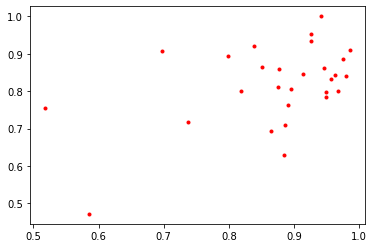

In [ ]:
plt.plot( dfN['armas_medios_contundentes'], dfN['total_catastrofes_0'], '.r')
plt.show()

In [ ]:
hurtosddw.groupby('departamento').sum().reset_index()

,departamento,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,1035,0,0,959,0,76,518,517,36,997,2,9,1026
8,casanare,961,0,0,905,0,56,431,530,27,929,5,33,928
9,cauca,3768,2,0,3338,1,427,1703,2065,142,3620,6,326,3442


In [ ]:
# Existe alguna relación y de que tipo entre la proporcion de robos por hogar (cantidad) y la invasion del espacio publico
dfN[['cantidad', 'inv_esp_publ']].sort_values('cantidad', ascending=0)
# Si, se puede apreciar una relacion positiva moderada entre las dos variables, una hipotesis podría ser: entre mayor sea la invasión de espacio publico
# más personas hay, y por tanto se pueden presentar más hurtos.

,cantidad,inv_esp_publ
13,17.567456,0.102217
24,15.458484,0.054152
3,14.524793,0.024793
17,10.625293,0.032787
25,8.362712,0.033898
1,7.588769,0.044048
26,7.392473,0.028226
22,7.269058,0.020179
19,6.958998,0.013667
15,6.205036,0.012590


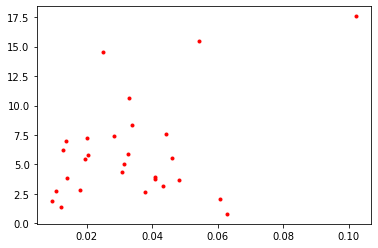

In [ ]:
plt.plot(dfN['inv_esp_publ'], dfN['cantidad'],'.r')
plt.show()

In [ ]:
dfN[['departamento', 'est_tar_el_alto', 'est_tar_el_medio - alto','est_tar_el_medio', 'est_tar_el_medio - bajo','est_tar_el_bajo',
       'est_tar_el_bajo - bajo', 
        'est_tar_el_no aplica',
       'est_tar_el_sin estrato']].sort_values('est_tar_el_bajo', ascending = 0)

X = pd.concat([dfN['departamento'], dfN['cantidad'], dfN['est_tar_el_bajo'] + dfN['est_tar_el_bajo - bajo'] + dfN['est_tar_el_medio - bajo'],
               dfN['est_tar_el_medio'], 
               dfN['est_tar_el_alto'] + dfN['est_tar_el_medio - alto']], axis = 1).sort_values('cantidad', ascending = 0).rename(columns = {0:'est_bajo',
                                                                                                                                            'est_tar_el_medio':'est_medio',
                                                                                                                                            1:'est_alto'})

In [ ]:
X

,departamento,cantidad,est_bajo,est_medio,est_alto
13,cundinamarca,17.567456,0.892522,0.069523,0.028936
24,santander,15.458484,0.929603,0.043321,0.000000
3,atlantico,14.524793,0.845041,0.074380,0.022727
17,meta,10.625293,0.920375,0.018735,0.000000
25,sucre,8.362712,0.928814,0.013559,0.000000
1,antioquia,7.588769,0.935777,0.023201,0.014459
26,tolima,7.392473,0.947581,0.002688,0.000000
22,risaralda,7.269058,0.952915,0.024664,0.000000
19,norte de santander,6.958998,0.904328,0.022779,0.000000
15,huila,6.205036,0.942446,0.041367,0.007194


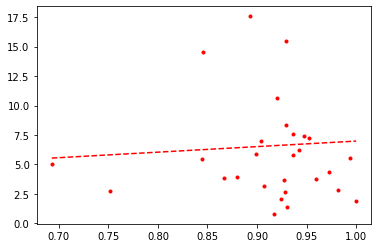

In [ ]:
z = np.polyfit(X['est_bajo'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_bajo']), max(X['est_bajo'])], [ min(p(X['est_bajo'])), max(p(X['est_bajo']))]]
plt.plot(x[0], x[1], '--r')
plt.plot(X['est_bajo'], X['cantidad'], '.r')
plt.show()

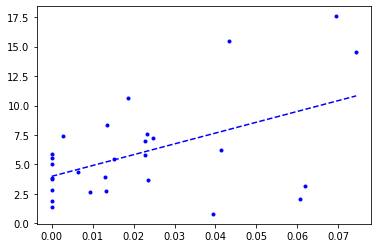

In [ ]:
z = np.polyfit(X['est_medio'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_medio']), max(X['est_medio'])], [ min(p(X['est_medio'])), max(p(X['est_medio']))]]
plt.plot(x[0], x[1], '--b')
plt.plot(X['est_medio'], X['cantidad'], '.b')
plt.show()

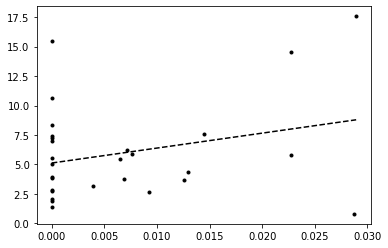

In [ ]:
z = np.polyfit(X['est_alto'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_alto']), max(X['est_alto'])], [ min(p(X['est_alto'])), max(p(X['est_alto']))]]
plt.plot(x[0], x[1], '--k')
plt.plot(X['est_alto'], X['cantidad'], '.k')
plt.show()

In [ ]:
X.corr()

,cantidad,est_bajo,est_medio,est_alto
cantidad,1.000000,-0.074345,0.501309,0.280273
est_bajo,-0.074345,1.000000,-0.083688,0.014934
est_medio,0.501309,-0.083688,1.000000,0.496677
est_alto,0.280273,0.014934,0.496677,1.000000


In [ ]:
# Cual es la relacion existente entre la cantidad de hurtos y el estrato de tarifa de energia de los hogares.

# Se evidencia una relación moderada entre las variables cantidad con el estrato medio y el estrato alto, mientras que con el estrato bajo se presenta una relacion nula
# por otra parte, entre mayor sea la proporcion de hogares estrato medio mayor sera la cantidad de hurtos al igual que ocurre en estrato alto pero con menor afinidad. 

In [ ]:
#¿Cuántos hurtos hay por departamento y por tipo?
(hurtosdw.groupby(['departamento','tipo']).sum()[['cantidad']]).reset_index()
#Falta ordenar por cantidad de robos.

,departamento,tipo,cantidad
0,amazonas,personas,136
1,antioquia,automotores,1300
2,antioquia,personas,21269
3,arauca,automotores,30
4,arauca,personas,375
5,atlantico,automotores,280
6,atlantico,personas,6750
7,bolivar,automotores,22
8,bolivar,personas,3034
9,boyaca,automotores,29


In [ ]:
#Por tipo de hurto, ¿Cuál es el arma más utilizada?
(hurtosdw.groupby(['tipo','armas_medios']).sum()[['cantidad']]).reset_index()

,tipo,armas_medios,cantidad
0,automotores,arma de fuego,3
1,automotores,llave maestra,5
2,automotores,sin empleo de armas,8041
3,personas,arma blanca / cortopunzante,33
4,personas,arma de fuego,36
5,personas,contundentes,128241
6,personas,sin empleo de armas,18556


In [ ]:
# ¿por grupo etareo y género cuantos hurtos se presentan?
(hurtosdw.groupby(['genero','agrupa_edad_persona']).sum()[['cantidad']]).reset_index()

,genero,agrupa_edad_persona,cantidad
0,femenino,adolescentes,1155
1,femenino,adultos,60238
2,femenino,menores,76
3,masculino,adolescentes,1871
4,masculino,adultos,91422
5,masculino,menores,153


In [ ]:
# ¿por género, cuál es el tipo de arma más utilizada?
(hurtosdw.groupby(['genero','armas_medios']).sum()[['cantidad']]).reset_index()
# diferencia entre arma blanca / cortopunzante y contundentes¡??

,genero,armas_medios,cantidad
0,femenino,arma blanca / cortopunzante,10
1,femenino,arma de fuego,12
2,femenino,contundentes,52796
3,femenino,llave maestra,1
4,femenino,sin empleo de armas,8650
5,masculino,arma blanca / cortopunzante,23
6,masculino,arma de fuego,27
7,masculino,contundentes,75445
8,masculino,llave maestra,4
9,masculino,sin empleo de armas,17947


In [ ]:
vivddw = pd.get_dummies(vivdw, columns=['zona', 'tipo_viv', 'paredes', 'piso', 'techo', 'cocina', 'est_tar_el', 'serv_wc', 'total_catastrofes', 'total_factores_amb'])

In [ ]:
vivddw.columns

Index(['directorio', 'fecha', 'ene_el', 'alcantarillado', 'rec_basura',
       'veces_rec_basura', 'acueducto', 'inundaciones', 'deslizamieto',
       'hundimiento', 'tormenta', 'ruido', 'olores', 'basura_cll', 'aire',
       'inv_esp_publ', 'animales', 'plagas', 'hog', 'departamento', 'region',
       'susp_ene', 'zona_corregimiento', 'zona_rural', 'zona_urbana',
       'tipo_viv_apartamento', 'tipo_viv_casa', 'tipo_viv_cuarto',
       'tipo_viv_otro', 'tipo_viv_vivienda indigena',
       'paredes_bahareque revocado', 'paredes_bahareque sin revocar',
       'paredes_guadua', 'paredes_ladrillo', 'paredes_lata',
       'paredes_prefabricado', 'paredes_sin paredes', 'paredes_tabla',
       'paredes_tapia', 'piso_alfombra', 'piso_baldosa', 'piso_cemento',
       'piso_madera pulida', 'piso_marmol', 'piso_tabla', 'piso_tierra',
       'techo_material de desecho', 'techo_paja', 'techo_plancha',
       'techo_teja barro', 'techo_teja cemento', 'techo_teja metalica',
       'techo_teja plasti

In [ ]:
# vivddw = pd.get_dummies(vivdw, columns=['zona', 'tipo_viv', 'paredes', 'piso', 'techo', 'cocina', 'est_tar_el', 'serv_wc', 'total_catastrofes', 'total_factores_amb'])

dicc = ['fecha', 'directorio', 'hog', 'departamento', 'region', 'zona_urbana', 'zona_corregimiento', 'zona_rural',
        'tipo_viv_apartamento', 'tipo_viv_casa', 'tipo_viv_cuarto', 'tipo_viv_otro', 'tipo_viv_vivienda indigena', 
        'paredes_bahareque revocado', 'paredes_bahareque sin revocar', 'paredes_guadua', 'paredes_ladrillo', 'paredes_lata', 'paredes_prefabricado', 'paredes_sin paredes', 'paredes_tabla', 'paredes_tapia', 
        'piso_alfombra', 'piso_baldosa', 'piso_cemento', 'piso_madera pulida', 'piso_marmol', 'piso_tabla', 'piso_tierra', 
        'techo_material de desecho', 'techo_paja', 'techo_plancha', 'techo_teja barro', 'techo_teja cemento', 'techo_teja metalica', 'techo_teja plastica', 
        'cocina_cuarto exclusivo', 'cocina_dormitorio', 'cocina_no preparan alimentos', 'cocina_patio', 'cocina_sala comedor',
        'ene_el', 'est_tar_el_alto', 'est_tar_el_bajo', 'est_tar_el_bajo - bajo', 'est_tar_el_medio', 'est_tar_el_medio - alto', 'est_tar_el_medio - bajo', 'est_tar_el_no aplica', 'est_tar_el_sin estrato', 
        'susp_ene', 'alcantarillado', 'serv_wc_bajamar', 'serv_wc_inodoro - alcantarillado', 'serv_wc_inodoro - pozo', 'serv_wc_inodoro sin conexion', 'serv_wc_letrina', 'serv_wc_no tiene', 
        'rec_basura', 'veces_rec_basura', 'acueducto', 'inundaciones', 'deslizamieto',
        'hundimiento', 'tormenta', 'total_catastrofes_0', 'total_catastrofes_1', 'total_catastrofes_2',
       'total_catastrofes_3', 'total_catastrofes_4', 'ruido', 'olores', 'basura_cll', 'aire',
        'inv_esp_publ', 'animales', 'plagas', 'total_factores_amb_0',
       'total_factores_amb_1', 'total_factores_amb_2', 'total_factores_amb_3',
       'total_factores_amb_4', 'total_factores_amb_5', 'total_factores_amb_6',
       'total_factores_amb_7']

vivddw = vivddw.loc[:, dicc]

In [ ]:
df = pd.concat([vivddw.groupby(['departamento']).count()['hog'], vivddw.groupby(['departamento']).sum().iloc[:, 2:]], axis = 1).reset_index()

In [ ]:
hurtosddw = pd.get_dummies(hurtosdw, columns=['armas_medios', 'genero', 'agrupa_edad_persona', 'tipo'])
dicc = ['fecha_hecho', 'departamento', 'cantidad',
       'armas_medios_arma blanca / cortopunzante',
       'armas_medios_arma de fuego', 'armas_medios_contundentes',
       'armas_medios_llave maestra', 'armas_medios_sin empleo de armas',
       'genero_femenino', 'genero_masculino',
       'agrupa_edad_persona_adolescentes', 'agrupa_edad_persona_adultos',
       'agrupa_edad_persona_menores', 'tipo_automotores', 'tipo_personas']
hurtosddw = hurtosddw.loc[:, dicc]

In [ ]:
hurtosddw = pd.concat([hurtosddw[['departamento','cantidad']], hurtosddw.iloc[:, 2:].apply(lambda x: x*x[0], axis = 1).iloc[:, 1:]], axis = 1)

In [ ]:
hurtosddw.groupby('departamento').sum().reset_index()

,departamento,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,1035,0,0,959,0,76,518,517,36,997,2,9,1026
8,casanare,961,0,0,905,0,56,431,530,27,929,5,33,928
9,cauca,3768,2,0,3338,1,427,1703,2065,142,3620,6,326,3442


In [ ]:
df = pd.merge(df, hurtosddw.groupby('departamento').sum().reset_index(), how = 'inner', on = 'departamento')

In [ ]:
df

,departamento,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0

In [ ]:
df.iloc[:,1:]
# hacer las dummies de total factores catastrofes y total factores ambientales, ademas en la base de hurtos c divide por cantidad y luego se pegan las bases

,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,est_tar_el_bajo,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,38.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,1289.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,91.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,137.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,89.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,545.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,304.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0,0.0,56.0,25.0,0.0,0.0,

In [ ]:
df

,departamento,hog,zona_urbana,zona_corregimiento,zona_rural,tipo_viv_apartamento,tipo_viv_casa,tipo_viv_cuarto,tipo_viv_otro,tipo_viv_vivienda indigena,paredes_bahareque revocado,paredes_bahareque sin revocar,paredes_guadua,paredes_ladrillo,paredes_lata,paredes_prefabricado,paredes_sin paredes,paredes_tabla,paredes_tapia,piso_alfombra,piso_baldosa,piso_cemento,piso_madera pulida,piso_marmol,piso_tabla,piso_tierra,techo_material de desecho,techo_paja,techo_plancha,techo_teja barro,techo_teja cemento,techo_teja metalica,techo_teja plastica,cocina_cuarto exclusivo,cocina_dormitorio,cocina_no preparan alimentos,cocina_patio,cocina_sala comedor,ene_el,est_tar_el_alto,...,serv_wc_no tiene,rec_basura,acueducto,inundaciones,deslizamieto,hundimiento,tormenta,total_catastrofes_0,total_catastrofes_1,total_catastrofes_2,total_catastrofes_3,total_catastrofes_4,ruido,olores,basura_cll,aire,inv_esp_publ,animales,plagas,total_factores_amb_0,total_factores_amb_1,total_factores_amb_2,total_factores_amb_3,total_factores_amb_4,total_factores_amb_5,total_factores_amb_6,total_factores_amb_7,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,66,66.0,0.0,0.0,32.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0,1.0,0.0,7.0,0.0,0.0,50.0,8.0,0.0,0.0,7.0,1.0,0.0,0.0,7.0,0.0,1.0,56.0,2.0,46.0,5.0,11.0,0.0,4.0,66,0.0,...,0.0,66,20,4,0,1,1,60.0,6.0,0.0,0.0,0.0,13,20,17,9,4,10,30,14.0,29.0,11.0,4.0,2.0,5.0,0.0,1.0,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,2974,1744.0,350.0,880.0,896.0,2000.0,58.0,3.0,17.0,31.0,55.0,3.0,2417.0,5.0,14.0,0.0,257.0,192.0,3.0,1550.0,1134.0,10.0,21.0,61.0,195.0,37.0,74.0,839.0,597.0,719.0,701.0,7.0,2645.0,93.0,60.0,31.0,145.0,2958,20.0,...,100.0,2261,2552,266,43,61,241,2513.0,350.0,84.0,15.0,12.0,506,563,269,287,131,370,705,1581.0,659.0,356.0,193.0,99.0,42.0,33.0,11.0,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,215,215.0,0.0,0.0,22.0,179.0,14.0,0.0,0.0,14.0,0.0,0.0,187.0,1.0,2.0,0.0,11.0,0.0,0.0,118.0,88.0,1.0,0.0,0.0,8.0,0.0,0.0,12.0,23.0,32.0,140.0,8.0,165.0,5.0,25.0,6.0,14.0,215,0.0,...,1.0,215,214,9,2,1,2,205.0,8.0,1.0,0.0,1.0,40,20,11,2,2,21,15,145.0,43.0,16.0,9.0,1.0,1.0,0.0,0.0,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,484,320.0,85.0,79.0,113.0,362.0,9.0,0.0,0.0,2.0,2.0,0.0,470.0,2.0,0.0,0.0,8.0,0.0,0.0,340.0,122.0,2.0,2.0,1.0,17.0,1.0,1.0,33.0,2.0,434.0,12.0,1.0,394.0,5.0,9.0,56.0,20.0,465,11.0,...,21.0,418,415,13,2,8,24,445.0,34.0,3.0,1.0,1.0,75,98,30,52,12,76,146,223.0,130.0,71.0,36.0,17.0,3.0,2.0,2.0,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,522,251.0,232.0,39.0,127.0,391.0,2.0,1.0,1.0,27.0,10.0,2.0,465.0,3.0,2.0,0.0,13.0,0.0,5.0,269.0,195.0,0.0,1.0,0.0,52.0,1.0,4.0,26.0,1.0,385.0,103.0,2.0,430.0,2.0,13.0,67.0,10.0,508,3.0,...,73.0,179,340,88,12,40,62,394.0,73.0,40.0,11.0,4.0,92,134,86,79,17,125,270,160.0,140.0,89.0,76.0,37.0,12.0,7.0,1.0,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,761,355.0,18.0,388.0,117.0,633.0,10.0,1.0,0.0,6.0,2.0,0.0,624.0,2.0,5.0,0.0,20.0,102.0,1.0,441.0,240.0,6.0,0.0,12.0,61.0,1.0,2.0,161.0,104.0,366.0,118.0,9.0,717.0,7.0,8.0,9.0,20.0,745,0.0,...,42.0,391,645,31,7,41,58,640.0,107.0,12.0,2.0,0.0,104,79,70,48,33,118,131,460.0,158.0,78.0,25.0,17.0,14.0,7.0,2.0,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,617,300.0,141.0,176.0,196.0,402.0,19.0,0.0,0.0,81.0,7.0,6.0,490.0,0.0,5.0,0.0,28.0,0.0,0.0,301.0,202.0,23.0,0.0,89.0,2.0,13.0,0.0,103.0,67.0,273.0,160.0,1.0,577.0,9.0,17.0,4.0,10.0,613,0.0,...,2.0,511,511,8,3,13,52,546.0,66.0,5.0,0.0,0.0,85,85,59,32,19,105,115,323.0,169.0,72.0,33.0,14.0,5.0,0.0,1.0,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,374,202.0,41.0,131.0,28.0,343.0,3.0,0.0,0.0,0.0,5.0,0.0,219.0,0.0,0.0,0.0,150.0,0.0,0.0,72.0,215.0,6.0

In [ ]:
 hurtosddwN = pd.merge(pd.concat([hurtosddw.groupby('departamento').sum().reset_index()['departamento'], hurtosddw.groupby('departamento').sum().reset_index().iloc[:,1:].apply(lambda x: x/x[0], axis = 1)], axis = 1), df['departamento'], how = 'inner', on = 'departamento').drop(columns='cantidad')

In [ ]:
dfN = pd.merge(pd.concat([df['departamento'], df.iloc[:,1:-12].apply(lambda x: x/x[0], axis = 1)], axis = 1), hurtosddwN, how = 'inner', on = 'departamento')

In [ ]:
############################
## Tabla de correlaciones ##
############################

dfN.corr().to_excel('/content/drive/MyDrive/Trabajo Final/correlations.xlsx')
vivdw.to_excel('/content/drive/MyDrive/Trabajo Final/df.xlsx')

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                # La distribucion de hurtos segun el genero se ve afectada por la zona ?
# No, la distribución es independiente de la zona, donde, al rededor del 60% de los hurtos dejan como victimas al género masculino y el 40% al género femenino.
dfN[dfN['zona_urbana'] != 1].sort_values('zona_urbana', ascending=False).head(3)[['departamento', 'zona_urbana','genero_masculino', 'genero_femenino']]

,departamento,zona_urbana,genero_masculino,genero_femenino
13,cundinamarca,0.838031,0.633859,0.366141
27,valle del cauca,0.679100,0.586315,0.413685
3,atlantico,0.661157,0.659175,0.340825


In [ ]:
dfN[dfN['zona_corregimiento'] != 1].sort_values('zona_corregimiento', ascending=False).head(3)[['departamento', 'zona_corregimiento','genero_masculino', 'genero_femenino']]

,departamento,zona_corregimiento,genero_masculino,genero_femenino
4,bolivar,0.444444,0.628599,0.371401
25,sucre,0.427119,0.593028,0.406972
14,guajira,0.393701,0.601399,0.398601


In [ ]:
dfN[dfN['zona_rural'] != 1].sort_values('zona_rural', ascending=False).head(3)[['departamento', 'zona_rural','genero_masculino', 'genero_femenino']]

,departamento,zona_rural,genero_masculino,genero_femenino
5,boyaca,0.509855,0.609214,0.390786
26,tolima,0.497312,0.585273,0.414727
15,huila,0.422662,0.534493,0.465507


In [ ]:
# El hecho de que no se presenten catastrofes tiene que ver que el tipo de arma utilizada en el hurto sea contundente
dfN.sort_values('total_catastrofes_0', ascending=1)[['total_catastrofes_0', 'armas_medios_contundentes']]
# Si hay una relacion positiva moderada, tal vez esto se deba a una variable oculta, pensamos que podrían ser los indigentes.

,total_catastrofes_0,armas_medios_contundentes
11,0.471795,0.585158
18,0.630303,0.885007
12,0.693227,0.865088
9,0.710207,0.885881
14,0.716535,0.736597
4,0.754789,0.518325
17,0.763466,0.890236
16,0.784483,0.949024
25,0.796610,0.948926
24,0.799639,0.967071


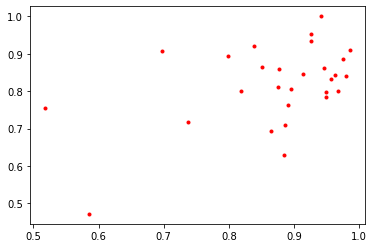

In [ ]:
plt.plot( dfN['armas_medios_contundentes'], dfN['total_catastrofes_0'], '.r')
plt.show()

In [ ]:
hurtosddw.groupby('departamento').sum().reset_index()

,departamento,cantidad,armas_medios_arma blanca / cortopunzante,armas_medios_arma de fuego,armas_medios_contundentes,armas_medios_llave maestra,armas_medios_sin empleo de armas,genero_femenino,genero_masculino,agrupa_edad_persona_adolescentes,agrupa_edad_persona_adultos,agrupa_edad_persona_menores,tipo_automotores,tipo_personas
0,amazonas,136,0,0,134,0,2,72,64,4,130,2,0,136
1,antioquia,22569,2,10,20636,2,1919,8833,13736,378,22166,25,1300,21269
2,arauca,405,0,0,375,0,30,178,227,7,397,1,30,375
3,atlantico,7030,0,1,5895,0,1134,2396,4634,60,6963,7,280,6750
4,bolivar,3056,1,2,1584,0,1469,1135,1921,30,3025,1,22,3034
5,boyaca,2431,0,0,2380,0,51,950,1481,105,2321,5,29,2402
6,caldas,2672,0,2,2605,0,65,1060,1612,111,2554,7,36,2636
7,caqueta,1035,0,0,959,0,76,518,517,36,997,2,9,1026
8,casanare,961,0,0,905,0,56,431,530,27,929,5,33,928
9,cauca,3768,2,0,3338,1,427,1703,2065,142,3620,6,326,3442


In [ ]:
# Existe alguna relación y de que tipo entre la proporcion de robos por hogar (cantidad) y la invasion del espacio publico
dfN[['cantidad', 'inv_esp_publ']].sort_values('cantidad', ascending=0)
# Si, se puede apreciar una relacion positiva moderada entre las dos variables, una hipotesis podría ser: entre mayor sea la invasión de espacio publico
# más personas hay, y por tanto se pueden presentar más hurtos.

,cantidad,inv_esp_publ
13,17.567456,0.102217
24,15.458484,0.054152
3,14.524793,0.024793
17,10.625293,0.032787
25,8.362712,0.033898
1,7.588769,0.044048
26,7.392473,0.028226
22,7.269058,0.020179
19,6.958998,0.013667
15,6.205036,0.012590


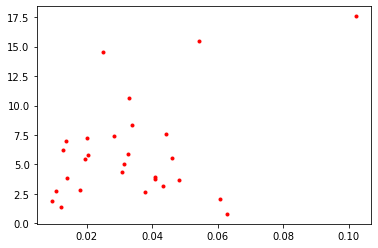

In [ ]:
plt.plot(dfN['inv_esp_publ'], dfN['cantidad'],'.r')
plt.show()

In [ ]:
dfN[['departamento', 'est_tar_el_alto', 'est_tar_el_medio - alto','est_tar_el_medio', 'est_tar_el_medio - bajo','est_tar_el_bajo',
       'est_tar_el_bajo - bajo', 
        'est_tar_el_no aplica',
       'est_tar_el_sin estrato']].sort_values('est_tar_el_bajo', ascending = 0)

X = pd.concat([dfN['departamento'], dfN['cantidad'], dfN['est_tar_el_bajo'] + dfN['est_tar_el_bajo - bajo'] + dfN['est_tar_el_medio - bajo'],
               dfN['est_tar_el_medio'], 
               dfN['est_tar_el_alto'] + dfN['est_tar_el_medio - alto']], axis = 1).sort_values('cantidad', ascending = 0).rename(columns = {0:'est_bajo',
                                                                                                                                            'est_tar_el_medio':'est_medio',
                                                                                                                                            1:'est_alto'})

In [ ]:
X

,departamento,cantidad,est_bajo,est_medio,est_alto
13,cundinamarca,17.567456,0.892522,0.069523,0.028936
24,santander,15.458484,0.929603,0.043321,0.000000
3,atlantico,14.524793,0.845041,0.074380,0.022727
17,meta,10.625293,0.920375,0.018735,0.000000
25,sucre,8.362712,0.928814,0.013559,0.000000
1,antioquia,7.588769,0.935777,0.023201,0.014459
26,tolima,7.392473,0.947581,0.002688,0.000000
22,risaralda,7.269058,0.952915,0.024664,0.000000
19,norte de santander,6.958998,0.904328,0.022779,0.000000
15,huila,6.205036,0.942446,0.041367,0.007194


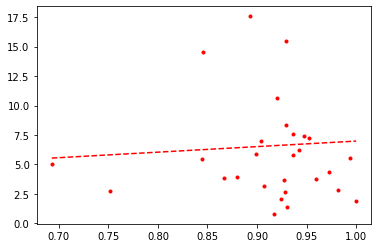

In [ ]:
z = np.polyfit(X['est_bajo'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_bajo']), max(X['est_bajo'])], [ min(p(X['est_bajo'])), max(p(X['est_bajo']))]]
plt.plot(x[0], x[1], '--r')
plt.plot(X['est_bajo'], X['cantidad'], '.r')
plt.show()

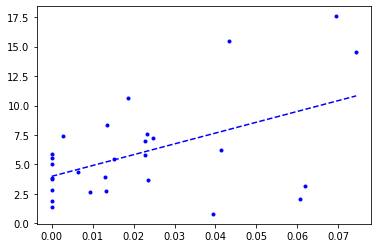

In [ ]:
z = np.polyfit(X['est_medio'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_medio']), max(X['est_medio'])], [ min(p(X['est_medio'])), max(p(X['est_medio']))]]
plt.plot(x[0], x[1], '--b')
plt.plot(X['est_medio'], X['cantidad'], '.b')
plt.show()

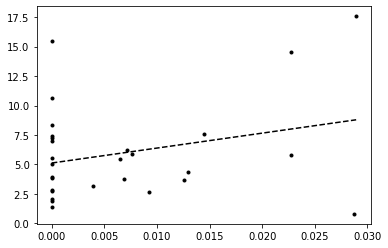

In [ ]:
z = np.polyfit(X['est_alto'], X['cantidad'], 1)
p = np.poly1d(z)
x = [ [min(X['est_alto']), max(X['est_alto'])], [ min(p(X['est_alto'])), max(p(X['est_alto']))]]
plt.plot(x[0], x[1], '--k')
plt.plot(X['est_alto'], X['cantidad'], '.k')
plt.show()

In [ ]:
X.corr()

,cantidad,est_bajo,est_medio,est_alto
cantidad,1.000000,-0.074345,0.501309,0.280273
est_bajo,-0.074345,1.000000,-0.083688,0.014934
est_medio,0.501309,-0.083688,1.000000,0.496677
est_alto,0.280273,0.014934,0.496677,1.000000


In [ ]:
# Cual es la relacion existente entre la cantidad de hurtos y el estrato de tarifa de energia de los hogares.

# Se evidencia una relación moderada entre las variables cantidad con el estrato medio y el estrato alto, mientras que con el estrato bajo se presenta una relacion nula
# por otra parte, entre mayor sea la proporcion de hogares estrato medio mayor sera la cantidad de hurtos al igual que ocurre en estrato alto pero con menor afinidad. 

#Prueba agregando coordenadas para visualizaciones (11/09/2021)

In [ ]:
depar_1=['amazonas','antioquia','arauca','atlantico','bolivar','boyaca','caldas',
                'caqueta','casanare','cauca','cesar','choco','cordoba','cundinamarca',
                'guajira','huila','magdalena','meta','narino','norte de santander','putumayo',
                'quindio','risaralda','san andres','santander','sucre','tolima','valle del cauca']
latitud=[-4.212965874365397,6.25184, 7.08471, 10.96854, 10.39972, 5.53528 ,5.06889, 1.61438, 5.33775, 2.43823, 10.46314, 5.69188, 
        8.74798, 4.60971, 11.54444, 2.9273, 11.24079, 4.142, 1.21361, 7.89391, 1.15284, 4.53389, 4.81333, 12.58317, 7.12539, 9.30472, 4.43889, 3.43722]
longitud= [-69.94297120613999, -75.56359, -70.75908, -74.78132, -75.51444, -73.36778 ,-75.51738, -75.60623, -72.39586, -76.61316, -73.25322, -76.65835,
        -75.88143, -74.08175, -72.90722, -75.28189, -74.19904, -73.62664, -77.28111, -72.50782, -76.65208, -75.68111, -75.69611, -81.70636, -73.1198, -75.39778, -75.23222, -76.5225]

In [ ]:
vivdw.shape

(22893, 32)

In [ ]:
(pd.merge(vivdw, pd.DataFrame({'departamento':depar_1,'latitud':latitud, 'longitud':longitud}), how = 'inner', on = 'departamento')).to_csv('/content/drive/MyDrive/Trabajo Final/df_v.csv')